## EDA ##


In [1]:

%matplotlib inline


In [2]:
#pip install -U ydata-profiling
#pip install pandas-profiling[notebook]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [4]:
pd.set_option('display.max_rows', 80) 

In [55]:
X_0 = pd.read_parquet("C:/Users/lpico/Downloads/X_t0.parquet")
y_0 = pd.read_parquet("C:/Users/lpico/Downloads/y_t0.parquet")
#df_0 = pd.concat([X_0, y_0])
df_0 = X_0.assign(label=y_0)

In [57]:
X_0.head()


borrow_block_number  borrow_timestamp  \
0              7711117      1.557197e+09   
1              7711123      1.557197e+09   
2              7711126      1.557197e+09   
3              7711672      1.557205e+09   
4              7712572      1.557217e+09   

                               wallet_address  first_tx_timestamp  \
0  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
1  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
2  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
3  0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6        1.557191e+09   
4  0xbd9ed130a53cfafcf81502e4d35329a6c4d53410        1.557217e+09   

   last_tx_timestamp  wallet_age  incoming_tx_count  outgoing_tx_count  \
0       1.557197e+09  19973049.0                199                438   
1       1.557197e+09  19973188.0                200                439   
2       1.557197e+09  19973238.0                201                440   
3       1.557198e+09     13922.0                  8                 56   
4       1.557217e+09       264.0                  2                  3   

   net_incoming_tx_count  total_gas_paid_eth  ...  market_macdsignal  \
0                   -239            0.397391  ...           1.212219   
1                   -239            0.399063  ...           1.212219   
2                   -239            0.400895  ...           1.212219   
3                    -48            0.604001  ...           1.212219   
4                     -1            0.003008  ...           1.212219   

   market_max_drawdown_365d  market_natr  market_plus_di  market_plus_dm  \
0                 -0.895911     4.479356       33.216622       33.415526   
1                 -0.895911     4.479356       33.216622       33.415526   
2                 -0.895911     4.479356       33.216622       33.415526   
3                 -0.895911     4.479356       33.216622       33.415526   
4                 -0.895911     4.479356       33.216622       33.415526   

   market_ppo  market_rocp  market_rocr  unique_borrow_protocol_count  \
0   -2.370346     0.104294     1.104294                             0   
1   -2.370346     0.104294     1.104294                             1   
2   -2.370346     0.104294     1.104294                             1   
3   -2.370346     0.104294     1.104294                             0   
4   -2.370346     0.104294     1.104294                             0   

   unique_lending_protocol_count  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  

[5 rows x 77 columns]

In [7]:
y_0.head()

target
0       1
1       1
2       1
3       0
4       0

In [58]:
print(X_0.columns)

Index(['borrow_block_number', 'borrow_timestamp', 'wallet_address',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_am

### Calculamos la cantidad de valores únicos por columna ###

In [59]:
def calcular_valores_distintos(df):
    """
    Calcula el número de valores distintos para cada variable en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame con los datos.

    Returns:
        pd.DataFrame: Un DataFrame con los nombres de las columnas y su cantidad de valores únicos.
    """
    valores_unicos = df.nunique().reset_index()
    valores_unicos.columns = ['Variable', 'Valores_Distintos']
    return valores_unicos.sort_values(by='Valores_Distintos', ascending=False)

# Ejemplo de uso
valores_distintos = calcular_valores_distintos(df_0)
print(valores_distintos)


                                   Variable  Valores_Distintos
9                        total_gas_paid_eth              44250
10                  avg_gas_paid_per_tx_eth              44247
5                                wallet_age              44069
20                      incoming_tx_avg_eth              44065
19                      outgoing_tx_avg_eth              43140
1                          borrow_timestamp              42584
0                       borrow_block_number              42584
4                         last_tx_timestamp              42555
27              total_available_borrows_eth              41662
18                      incoming_tx_sum_eth              41229
42                 time_since_first_deposit              40853
17                      outgoing_tx_sum_eth              39320
25                     total_collateral_eth              38220
28          total_available_borrows_avg_eth              37125
26                 total_collateral_avg_eth            

Del resultado vemos que existen 4 variables binarias, de las cuales una es la variable 'target' y que varias columnas que representan indicadores de comportamiento del mercado tienen una cantidad de valores únicos determinado, por lo que podrían considerarse como variables categóricas ordinales

Utilizamos ProfileReport para generar un EDA automático y analizar algunas variables

In [60]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_0, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A partir de los resultados generados por el EDA automático, podemos rescatar que el dataset cuenta con 78 columnas (77 de tipo numerico y 1 de tipo texto) y 88.592 registros. Además, el 50% del dataset son valores faltantes, donde vemos además que estos datos faltantes se reparten en varias columnas que poseen 50% de datos nulos.

In [61]:
# Calcular el porcentaje de valores nulos por fila
percent_missing_per_row = df_0.isnull().mean(axis=1)

# Identificar las filas con más del 90% de valores nulos
rows_with_high_nulls = df_0[percent_missing_per_row > 0.9]

# Mostrar las filas con más del 90% de valores nulos
print(rows_with_high_nulls)

# Opcional: Contar cuántos registros cumplen esta condición
count_high_null_rows = len(rows_with_high_nulls)
print(f"Número de registros con más del 70% de valores nulos: {count_high_null_rows}")

Empty DataFrame
Columns: [borrow_block_number, borrow_timestamp, wallet_address, first_tx_timestamp, last_tx_timestamp, wallet_age, incoming_tx_count, outgoing_tx_count, net_incoming_tx_count, total_gas_paid_eth, avg_gas_paid_per_tx_eth, risky_tx_count, risky_unique_contract_count, risky_first_tx_timestamp, risky_last_tx_timestamp, risky_first_last_tx_timestamp_diff, risky_sum_outgoing_amount_eth, outgoing_tx_sum_eth, incoming_tx_sum_eth, outgoing_tx_avg_eth, incoming_tx_avg_eth, max_eth_ever, min_eth_ever, total_balance_eth, risk_factor, total_collateral_eth, total_collateral_avg_eth, total_available_borrows_eth, total_available_borrows_avg_eth, avg_weighted_risk_factor, risk_factor_above_threshold_daily_count, avg_risk_factor, max_risk_factor, borrow_amount_sum_eth, borrow_amount_avg_eth, borrow_count, repay_amount_sum_eth, repay_amount_avg_eth, repay_count, borrow_repay_diff_eth, deposit_count, deposit_amount_sum_eth, time_since_first_deposit, withdraw_amount_sum_eth, withdraw_depos

A partir de estos resultados vemos que los datos faltantes de las columnas con 50% de datos faltantes calzan con los mismos registros

Riesgo y comportamiento financiero:

- risk_factor: Factor de riesgo general de la billetera; es probable que esté estrechamente relacionado con la morosidad.
- avg_risk_factor, max_risk_factor: Proporcionan contexto sobre la evolución del riesgo. Valores altos o crecientes podrían correlacionarse con morosidad.
- risk_factor_above_threshold_daily_count: Indica la frecuencia con la que el riesgo supera un umbral crítico, lo que podría ser un claro indicador de riego de no-pago
- avg_weighted_risk_factor: Promedio ponderado que puede captar fluctuaciones en el riesgo.

Préstamos y reembolsos:

- borrow_amount_sum_eth, borrow_amount_avg_eth: Muestran la magnitud de los préstamos realizados.
- repay_amount_sum_eth, repay_amount_avg_eth, repay_count: Capturan el historial de reembolsos. Bajos valores relativos a los préstamos pueden indicar morosidad.
- borrow_repay_diff_eth: La diferencia entre lo prestado y lo reembolsado también puede ser un fuerte indicador de morosidad.
- borrow_count: Un alto número de préstamos podría correlacionarse con estrés financiero y por ende mayor probabilidad de morosidad

Colateral y liquidez:

- total_collateral_eth, total_collateral_avg_eth: Indican el respaldo financiero disponible; bajos valores pueden reflejar mayor riesgo.
- total_balance_eth: Balance total de ETH disponible
- liquidation_count, liquidation_amount_sum_eth: Número y monto de liquidaciones pasadas son señales claras de problemas financieros.

Actividad transaccional:

- incoming_tx_count, outgoing_tx_count, net_incoming_tx_count: Reflejan la actividad general de la billetera.
- risky_tx_count, risky_unique_contract_count: Transacciones asociadas con contratos riesgosos pueden indicar comportamiento financiero problemático.

Variables relacionadas al mercado:

Este tipo de  variables pueden influir indirectamente si las condiciones del mercado afectan la capacidad del cliente para pagar:

- market_max_drawdown_365d: Una caída prolongada en el mercado puede influir en la morosidad.
- market_linearreg_slope y market_aroonosc: Indicadores de tendencias que pueden influir en la estabilidad financiera.
- market_macd, market_ppo, market_cmo: Indicadores técnicos que reflejan las condiciones del mercado.

También es relevante analizar la variable "target" la cual, al igual que varias otras características, tiene un 50% de datos faltantes.Observamos además que las clases están balanceadas, es decir, del 50% restante aproximadamente un 25% de valores son 1 (Morosidad) y el otro 25% aproximadamente son (0)

Ploteamos una matriz de correlación

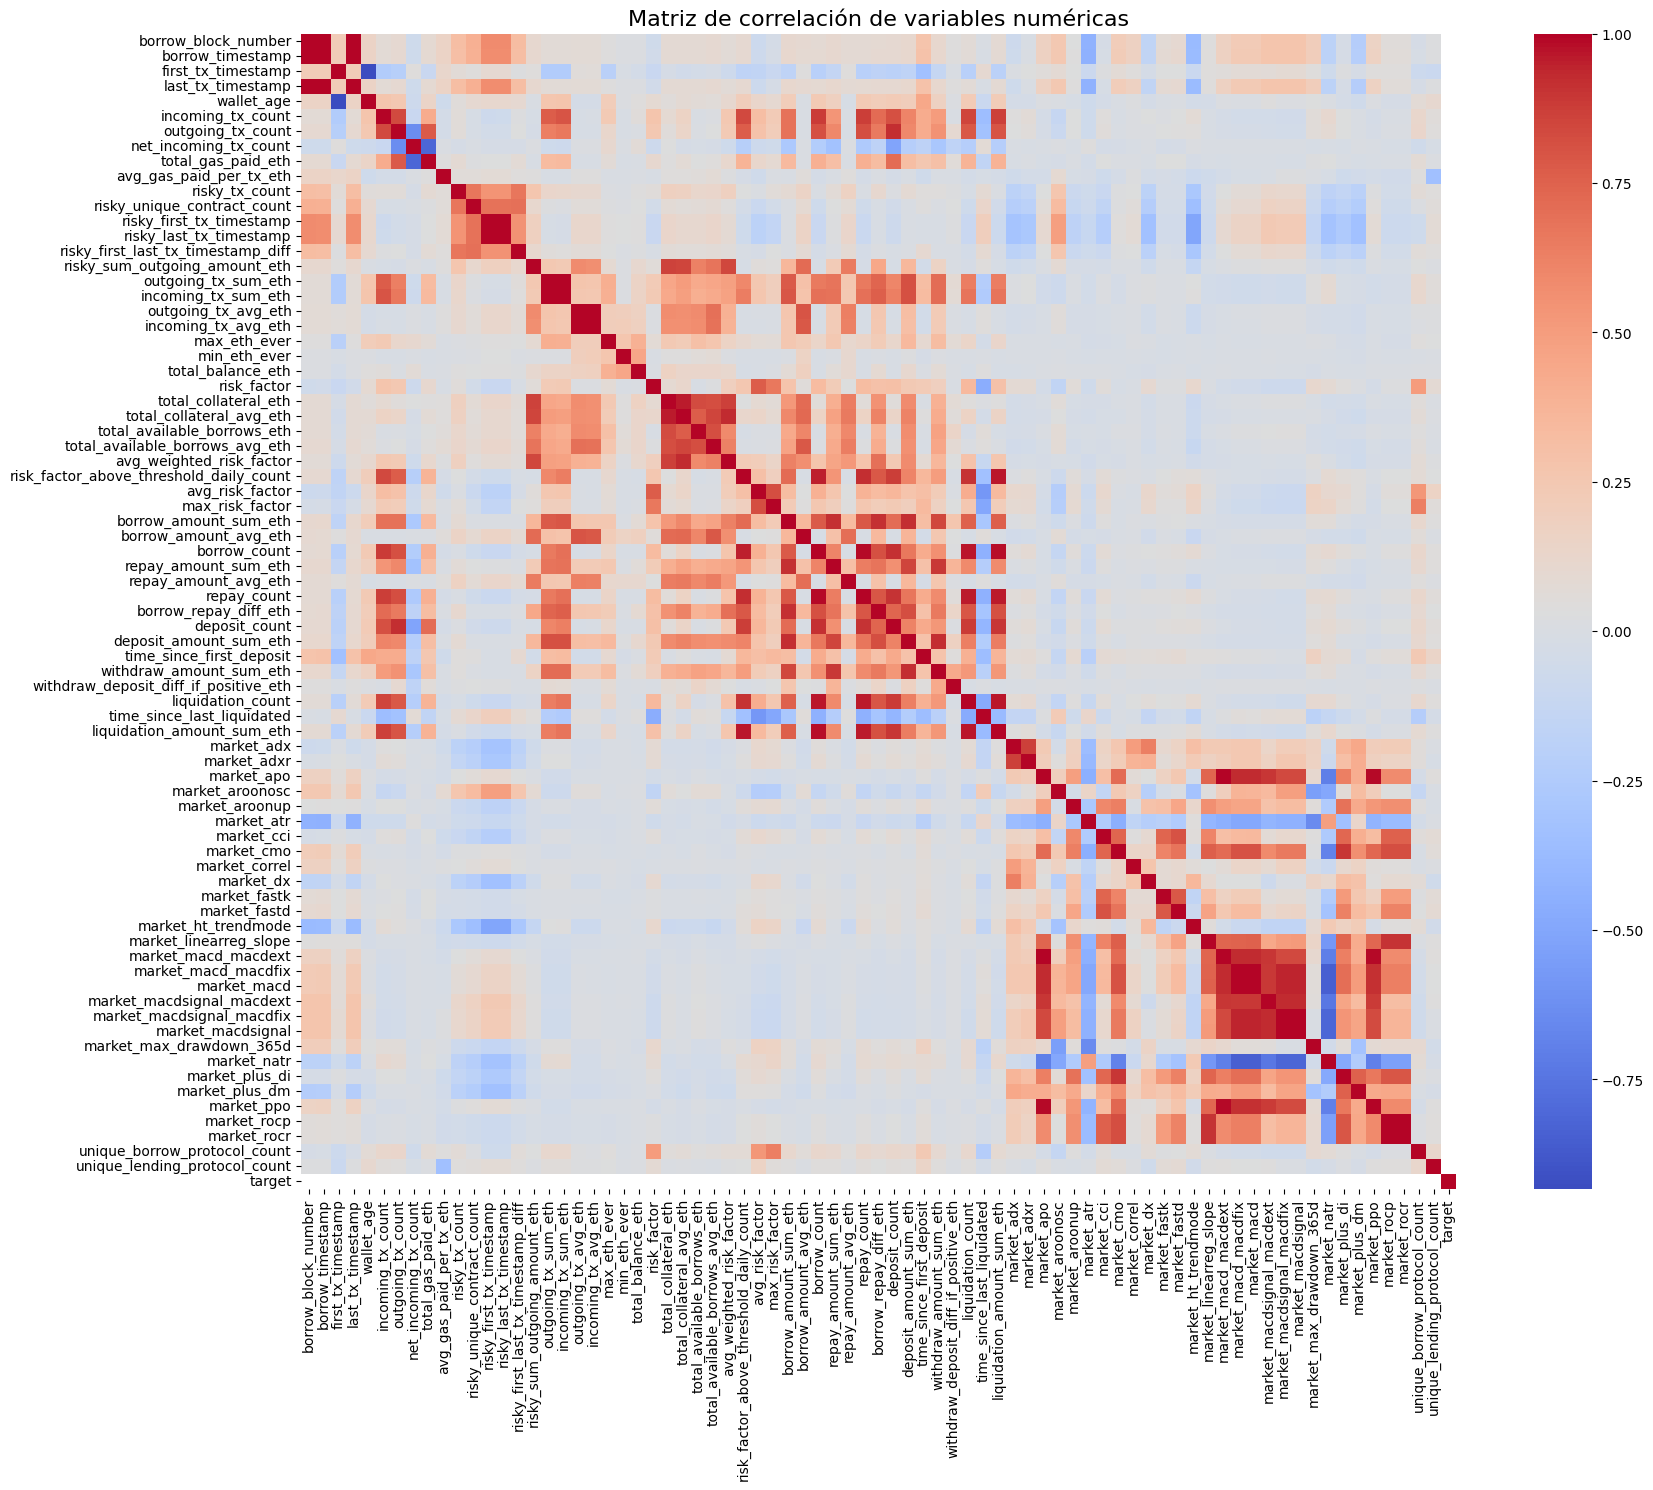

In [10]:
numerical_columns = df_0.select_dtypes(include = [np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Configurar el tamaño del heatmap
plt.figure(figsize=(20, 15))

# Crear un heatmap de la matriz de correlación
sns.heatmap(
    correlation_matrix,
    annot=False, 
    cmap="coolwarm",
    square=True
)

# Mostrar el heatmap
plt.title("Matriz de correlación de variables numéricas", fontsize=16)
plt.show()

In [11]:
# Crea una función para identificar variables con alta correlación
def get_highly_correlated_vars(df, threshold=0.85):
    """
    Encuentra pares de variables con correlación absoluta mayor al umbral especificado.

    Args:
        df (pd.DataFrame): DataFrame con las variables a analizar.
        threshold (float): Umbral de correlación.

    Returns:
        list: Lista de tuplas con pares de columnas que tienen correlación mayor al umbral.
    """
    # Calcula la matriz de correlación
    corr_matrix = correlation_matrix

    # Filtra la matriz para valores superiores al umbral, excluyendo la diagonal
    high_corr_pairs = [
        (col1, col2)
        for col1 in corr_matrix.columns
        for col2 in corr_matrix.columns
        if col1 != col2 and corr_matrix.loc[col1, col2] > threshold
    ]
    
    return high_corr_pairs

# Aplica la función a tu DataFrame
high_corr_vars = get_highly_correlated_vars(df_0, threshold=0.85)

# Imprime los resultados
print("Pares de variables con correlación alta:")
for pair in high_corr_vars:
    print(pair)


Pares de variables con correlación alta:
('borrow_block_number', 'borrow_timestamp')
('borrow_block_number', 'last_tx_timestamp')
('borrow_timestamp', 'borrow_block_number')
('borrow_timestamp', 'last_tx_timestamp')
('last_tx_timestamp', 'borrow_block_number')
('last_tx_timestamp', 'borrow_timestamp')
('incoming_tx_count', 'borrow_count')
('incoming_tx_count', 'repay_count')
('incoming_tx_count', 'liquidation_count')
('incoming_tx_count', 'liquidation_amount_sum_eth')
('outgoing_tx_count', 'deposit_count')
('risky_first_tx_timestamp', 'risky_last_tx_timestamp')
('risky_last_tx_timestamp', 'risky_first_tx_timestamp')
('risky_sum_outgoing_amount_eth', 'total_collateral_eth')
('risky_sum_outgoing_amount_eth', 'total_collateral_avg_eth')
('outgoing_tx_sum_eth', 'incoming_tx_sum_eth')
('incoming_tx_sum_eth', 'outgoing_tx_sum_eth')
('outgoing_tx_avg_eth', 'incoming_tx_avg_eth')
('incoming_tx_avg_eth', 'outgoing_tx_avg_eth')
('total_collateral_eth', 'risky_sum_outgoing_amount_eth')
('total_co

 - Timestamp y Block Numbers:

Variables como borrow_block_number, borrow_timestamp y last_tx_timestamp están estrechamente correlacionadas porque ambas representan puntos de tiempo de eventos similares. Puedes conservar solo una de ellas, dependiendo del nivel de granularidad que necesites (por ejemplo, timestamps suelen ser más interpretables).
Transacciones Entrantes y Salientes:

Las variables como incoming_tx_count y borrow_count, repay_count o liquidation_count están correlacionadas porque representan conteos relacionados con transacciones de procesos correlacionados. Puedes seleccionar una que mejor capture la relación con tu objetivo o que sea menos redundante.

- Montos Totales y Promedios:

Variables como total_collateral_eth y total_collateral_avg_eth o outgoing_tx_sum_eth y incoming_tx_sum_eth están relacionadas porque los promedios derivan de los totales.

- Indicadores Financieros:

Muchas métricas de mercado como market_macd, market_macdsignal, market_ppo, etc., tienen relaciones que son bastante predecibles por su naturaleza técnica. or ejemplo, solo market_macd y market_ppo).

## Análisis multivariado ##


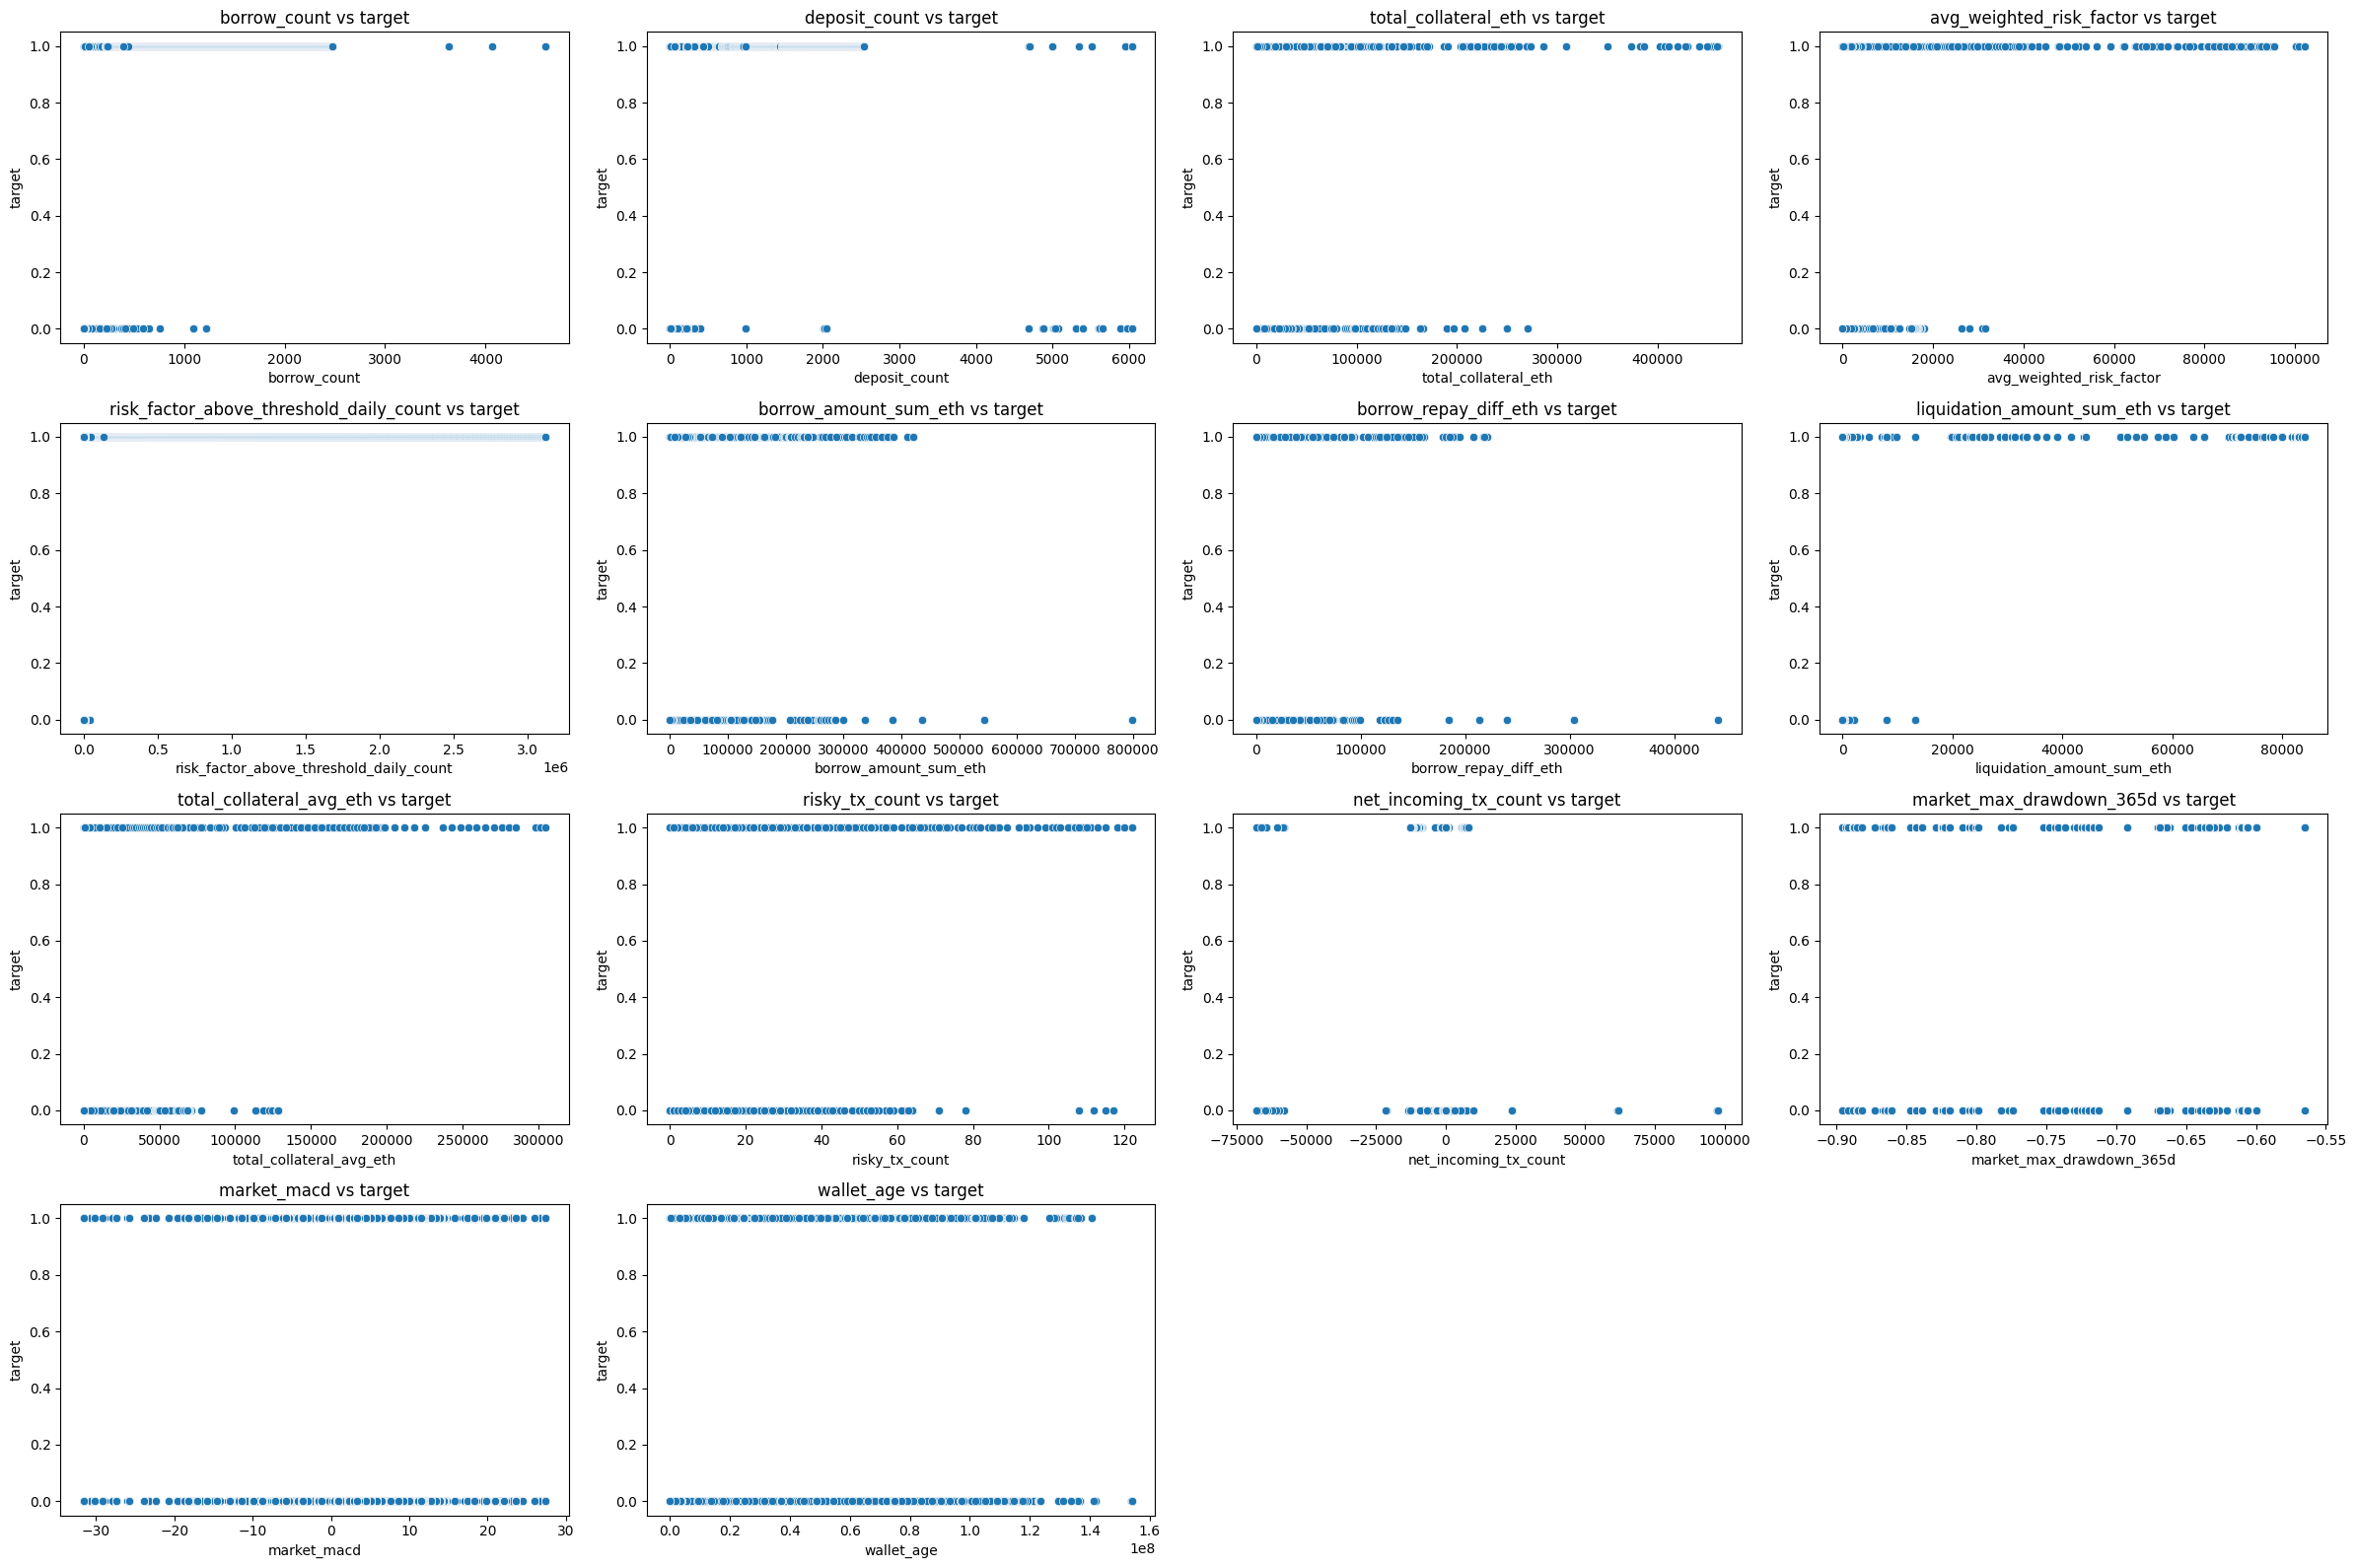

In [12]:
def graficar_scatterplots_grandes(df, variables, target, tamaño_base=(6, 4)):
    """
    Genera scatter plots para visualizar la relación entre variables seleccionadas y la variable target.
    
    Args:
        df (pd.DataFrame): El DataFrame con los datos.
        variables (list): Lista de variables a graficar.
        target (str): Nombre de la variable objetivo.
        tamaño_base (tuple): Tamaño base (ancho, alto) para cada subplot.
    """
    num_variables = len(variables)
    columnas = 4  # Fijamos 4 columnas
    filas = math.ceil(num_variables / columnas)  # Calculamos las filas necesarias
    
    # Ajustamos el tamaño total de la figura
    tamaño_figura = (tamaño_base[0] * columnas, tamaño_base[1] * filas)
    
    fig, axes = plt.subplots(filas, columnas, figsize=tamaño_figura)
    axes = axes.flatten()  # Aplanamos los ejes para iterar fácilmente
    
    for i, var in enumerate(variables):
        sns.scatterplot(data=df, x=var, y=target, ax=axes[i])
        axes[i].set_title(f"{var} vs {target}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
    
    # Ocultar subplots adicionales si los hay
    for j in range(len(variables), len(axes)):
        axes[j].axis('off')
    
    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

# Lista de variables importantes
variables_importantes = [
    'borrow_count', 'deposit_count', 'total_collateral_eth', 'avg_weighted_risk_factor',
    'risk_factor_above_threshold_daily_count', 'borrow_amount_sum_eth', 'borrow_repay_diff_eth',
    'liquidation_amount_sum_eth', 'total_collateral_avg_eth', 'risky_tx_count',
    'net_incoming_tx_count', 'market_max_drawdown_365d', 'market_macd', 'wallet_age'
]

# Variable objetivo
target = 'target'  # Reemplaza con tu variable objetivo

# Llamada a la función
graficar_scatterplots_grandes(df_0, variables_importantes, target)

De estos graficos podemos notar cosas interesantes, como que, por ejemplo, la probabilidad de morosidad está más relacionada con la cantidad de préstamos que con el monto de estos. Además de la relación entre algunas variables importantes y la probabilidad de morosidad

## (Opcional) Construcción de variables ##

Finalmente, para términar con este EDA construimos algunas variables adicionales que pueden servir a la hora de prediecir la probabilidad de morosidad de un cliente

In [ ]:
def crear_nuevas_variables(df):
    """
    Crea nuevas variables útiles para predecir morosidad en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame con los datos originales.

    Returns:
        pd.DataFrame: El DataFrame con nuevas variables agregadas.
    """
    df = df.copy()
    
    # 1. Ratios financieros
    df['ratio_deuda_depositos'] = df['borrow_amount_sum_eth'] / (df['deposit_amount_sum_eth'] + 1e-6)
    df['diferencia_ingresos_egresos'] = df['incoming_tx_sum_eth'] - df['outgoing_tx_sum_eth']
    df['ratio_prestamos_pagos'] = df['borrow_amount_sum_eth'] / (df['repay_amount_sum_eth'] + 1e-6)
    
    # 2. Tiempos y frecuencias
    df['dias_desde_ultimo_pago'] = (df['last_tx_timestamp'] - df['borrow_timestamp']).dt.days

    return df

In [ ]:
def crear_variables_morosidad(df):
    """
    Crea variables basadas en literatura financiera para predecir morosidad.

    Args:
        df (pd.DataFrame): El DataFrame con los datos originales.

    Returns:
        pd.DataFrame: El DataFrame con las nuevas variables agregadas.
    """
    df = df.copy()

    # 1. Ratios financieros
    df['ratio_deuda_ingresos'] = df['borrow_amount_sum_eth'] / (df['incoming_tx_sum_eth'] + 1e-6)
    df['ratio_pagos_minimos'] = df['repay_amount_sum_eth'] / (df['min_required_payment_eth'] + 1e-6)
    df['tasa_utilizacion_credito'] = df['borrow_amount_sum_eth'] / (df['credit_limit_eth'] + 1e-6)

    # 2. Comportamiento de pagos
    df['dias_retraso_promedio'] = df['dias_retraso_total'] / (df['total_pagos'] + 1e-6)
    df['cantidad_pagos_atrasados'] = df['dias_retraso_total'] > 0
    df['historial_pagos_positivos'] = (df['total_pagos'] - df['cantidad_pagos_atrasados']) / (df['total_pagos'] + 1e-6)

    # 3. Frecuencias y tendencias
    df['tendencia_ingresos'] = (df['incoming_tx_sum_eth'] - df['prev_month_incoming_tx_sum_eth']) / (df['prev_month_incoming_tx_sum_eth'] + 1e-6)
    df['frecuencia_uso_credito'] = df['borrow_count'] / (df['wallet_age'] + 1e-6)
    df['volatilidad_transacciones'] = df['incoming_tx_sum_eth'].rolling(3).std()

    return df

## Preprocesamiento ##


Decidimos eliminar algunas columnas irrelevantes para predecir morosidad junto con aquellas columnas que tienen una alta correlación positiva.
Con respecto a las filas, debido a que gran parte de ellas tienen más de un 90% de datos faltantes (debido a las columnas con un 50% de datos faltantes) decidimos conservarlas para no peder mucha información

--- Decidimos imputar datos faltantes en las columnas con missing values, debido a que representan una gran cantidad de datos con respecto al dataset y además algunas de estas columnas pueden ser relevantes a la hora de predecir la morosidad

Eliminamos la variable 'wallet_address' ya que corresponde a un identificador

In [62]:
df_0 = df_0.drop('wallet_address', axis = 1)


In [63]:
def eliminar_variables_correlacionadas(df, umbral=0.8):
    """
    Elimina variables altamente correlacionadas en un DataFrame.
    
    Args:
        df (pd.DataFrame): El DataFrame con las variables.
        umbral (float): El umbral de correlación para considerar variables como redundantes.
        
    Returns:
        pd.DataFrame: El DataFrame con las variables redundantes eliminadas.
        list: Lista de variables eliminadas.
    """

    df = df.copy()

    # Calcular la matriz de correlación
    matriz_correlacion = df.corr()
    
    # Seleccionar las variables altamente correlacionadas
    variables_a_eliminar = set()
    for i in range(len(matriz_correlacion.columns)):
        for j in range(i):
            if abs(matriz_correlacion.iloc[i, j]) > umbral:
                col1 = matriz_correlacion.columns[i]
                col2 = matriz_correlacion.columns[j]
                
                # Seleccionar qué variable eliminar (por ejemplo, la segunda)
                variables_a_eliminar.add(col2)
    
    # Eliminar las variables seleccionadas
    df_reducido = df.drop(columns=variables_a_eliminar)
    
    return df_reducido, list(variables_a_eliminar)

In [64]:
# Ejemplo de uso con un DataFrame llamado `df`
df_reducido, eliminadas = eliminar_variables_correlacionadas(df_0, umbral=0.8)

print("Variables eliminadas por alta correlación:")
print(eliminadas)
print("\nDataFrame reducido:")
print(df_reducido.head())

Variables eliminadas por alta correlación:
['market_macd_macdfix', 'market_macdsignal', 'total_collateral_eth', 'market_cci', 'first_tx_timestamp', 'borrow_repay_diff_eth', 'market_adx', 'risk_factor_above_threshold_daily_count', 'avg_risk_factor', 'outgoing_tx_avg_eth', 'risky_first_tx_timestamp', 'outgoing_tx_count', 'market_cmo', 'incoming_tx_sum_eth', 'deposit_amount_sum_eth', 'outgoing_tx_sum_eth', 'incoming_tx_count', 'borrow_amount_sum_eth', 'market_apo', 'total_collateral_avg_eth', 'borrow_block_number', 'total_available_borrows_eth', 'liquidation_count', 'market_macd_macdext', 'market_rocp', 'net_incoming_tx_count', 'market_linearreg_slope', 'risky_sum_outgoing_amount_eth', 'market_macdsignal_macdext', 'market_macd', 'borrow_timestamp', 'borrow_count', 'repay_count', 'repay_amount_sum_eth', 'market_macdsignal_macdfix', 'deposit_count']

DataFrame reducido:
   last_tx_timestamp  wallet_age  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
0       1.557197e+09  19973049.0         

In [71]:
def eliminar_columnas_irrelevantes (df, correlation_threshold = 0.05):
    df = df.copy()
    correlations = df.corr()['label']
    relevant_columns = correlations[abs(correlations) >= correlation_threshold].index.tolist()
    df_filtered = df[relevant_columns]
    return df_filtered , relevant_columns


In [74]:
df_final, relevant_columns = eliminar_columnas_irrelevantes(df_reducido)

## Entrenamiento ##


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

def train_pipelines(df, target, test_size=0.3, random_state=42):
    # Identificar columnas numéricas
    num_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols.remove(target)  # Excluir la columna objetivo

    # Dividir en train y test
    X = df[num_cols]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Crear el preprocesador
    imputer = SimpleImputer(strategy='median')
    scaler = RobustScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([('imputer', imputer), ('scaler', scaler)]), num_cols)
        ]
    )

    # Lista de modelos
    models = {
        "RandomForest": RandomForestClassifier(random_state=random_state),
        "XGBoost": XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(random_state=random_state),
        "CatBoost": CatBoostClassifier(random_state=random_state, verbose=0)
    }

    results = {}

    for name, model in models.items():
        print(f"\nEntrenando con {name}...")
        
        # Crear pipeline completo
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Entrenar el pipeline
        pipeline.fit(X_train, y_train)

        # Evaluar el modelo
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)

        y_pred = pipeline.predict(X_test)
        print(f"Resultados de {name}:")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

        # Guardar resultados
        results[name] = {
            "pipeline": pipeline,
            "train_score": train_score,
            "test_score": test_score
        }

    return results


In [ ]:
# Llamar a la función con un DataFrame
resultados = train_pipelines(df, target='target')

# Ver resultados
for modelo, info in resultados.items():
    print(f"\nModelo: {modelo}")
    print(f"Train Score: {info['train_score']:.4f}")
    print(f"Test Score: {info['test_score']:.4f}")


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier




# Paso 1: Función para eliminar outliers
#def remove_outliers(X, y=None):
#    Q1 = X.quantile(0.25)
#    Q3 = X.quantile(0.75)
#   IQR = Q3 - Q1
#    mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
#    if y is not None:
#        return X[mask], y[mask]
#    return X[mask]

#class OutlierRemover(BaseEstimator, TransformerMixin):
#    def fit(self, X, y=None):
#        return self

#    def transform(self, X, y=None):
#        return remove_outliers(X, y)

# Paso 2: Función general que toma un DataFrame
def train_pipeline(df, target, test_size=0.3, random_state=42):
    # Identificar columnas numéricas
    num_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols.remove(target)  # Excluir la columna objetivo
    
    # Dividir en train y test
    X = df[num_cols]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Paso 3: Crear el preprocesador
    imputer = SimpleImputer(strategy='median')
    scaler = RobustScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([('imputer', imputer), ('scaler', scaler)]), num_cols)
        ]
    )
    
    # Paso 4: Modelo
    model = RandomForestClassifier(random_state=random_state)  # Aqui cambiar por el modelo que queramos
    
    # Paso 5: Crear pipeline completo
    pipeline = Pipeline(steps=[
        #('outlier_removal', OutlierRemover()),
        ('preprocessor', preprocessor),        
        ('model', model)                       
    ])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluar el modelo
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)

    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    return pipeline, train_score, test_score

In [79]:
pipeline, train_score, test_score = train_pipeline(df_0, target='label')

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6484
           1       0.94      0.86      0.90      6805

    accuracy                           0.90     13289
   macro avg       0.90      0.90      0.90     13289
weighted avg       0.90      0.90      0.90     13289

[[6112  372]
 [ 967 5838]]
Train Score: 1.0
Test Score: 0.8992399729099255


XGBoost

In [ ]:

# Paso 1: Función para eliminar outliers
#def remove_outliers(X, y=None):
#    Q1 = X.quantile(0.25)
#    Q3 = X.quantile(0.75)
#   IQR = Q3 - Q1
#    mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
#    if y is not None:
#        return X[mask], y[mask]
#    return X[mask]

#class OutlierRemover(BaseEstimator, TransformerMixin):
#    def fit(self, X, y=None):
#        return self

#    def transform(self, X, y=None):
#        return remove_outliers(X, y)

# Paso 2: Función general que toma un DataFrame
def train_pipeline(df, target, test_size=0.3, random_state=42):
    # Identificar columnas numéricas
    num_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols.remove(target)  # Excluir la columna objetivo
    
    # Dividir en train y test
    X = df[num_cols]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Paso 3: Crear el preprocesador
    imputer = SimpleImputer(strategy='median')
    scaler = RobustScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([('imputer', imputer), ('scaler', scaler)]), num_cols)
        ]
    )
    
    # Paso 4: Modelo
    model = XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss')

  # Aqui cambiar por el modelo que queramos
    
    # Paso 5: Crear pipeline completo
    pipeline = Pipeline(steps=[
        #('outlier_removal', OutlierRemover()),
        ('preprocessor', preprocessor),        
        ('model', model)                       
    ])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluar el modelo
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)

    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    return pipeline, train_score, test_score

In [ ]:

# Paso 1: Función para eliminar outliers
#def remove_outliers(X, y=None):
#    Q1 = X.quantile(0.25)
#    Q3 = X.quantile(0.75)
#   IQR = Q3 - Q1
#    mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
#    if y is not None:
#        return X[mask], y[mask]
#    return X[mask]

#class OutlierRemover(BaseEstimator, TransformerMixin):
#    def fit(self, X, y=None):
#        return self

#    def transform(self, X, y=None):
#        return remove_outliers(X, y)

# Paso 2: Función general que toma un DataFrame
def train_pipeline(df, target, test_size=0.3, random_state=42):
    # Identificar columnas numéricas
    num_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols.remove(target)  # Excluir la columna objetivo
    
    # Dividir en train y test
    X = df[num_cols]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Paso 3: Crear el preprocesador
    imputer = SimpleImputer(strategy='median')
    scaler = RobustScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([('imputer', imputer), ('scaler', scaler)]), num_cols)
        ]
    )
    
    # Paso 4: Modelo
    model = LGBMClassifier(random_state=random_state)

  # Aqui cambiar por el modelo que queramos
    
    # Paso 5: Crear pipeline completo
    pipeline = Pipeline(steps=[
        #('outlier_removal', OutlierRemover()),
        ('preprocessor', preprocessor),        
        ('model', model)                       
    ])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluar el modelo
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)

    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    return pipeline, train_score, test_score

## Evaluación ##

In [ ]:
def print_feature_importances(pipeline, feature_names):
    """
    Imprime las importancias de las características del modelo entrenado dentro del pipeline.
    """
    # Acceder al modelo desde el pipeline
    model = pipeline.named_steps['model']
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        print("Variables más relevantes:\n")
        print(feature_importance_df)
        return feature_importance_df
    else:
        print("El modelo no tiene el atributo `feature_importances_`.")
        return None


In [ ]:
print_feature_importances(pipeline, num_cols)

### ZIP ###


In [80]:
X_test = pd.read_parquet("C:/Users/lpico/Downloads/X_t1.parquet")

In [82]:
from zipfile import ZipFile
import os
def generateFiles(predict_data, clf_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    ---------------
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf

    Ouput
    ---------------
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict_proba(predict_data)[:, 1]
    with open('./predictions.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)
    
    with ZipFile('predictions.zip', 'w') as zipObj:
        zipObj.write('predictions.txt')
    os.remove('predictions.txt')

generateFiles(X_test, pipeline)